# Toxicity Analysis

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/toxicity](https://github.com/huseinzol05/Malaya/tree/master/example/toxicity).
    
</div>

<div class="alert alert-info">

This module trained on both standard and local (included social media) language structures, so it is save to use for both.
    
</div>

In [1]:
%%time
import malaya

CPU times: user 4.94 s, sys: 665 ms, total: 5.6 s
Wall time: 4.66 s


### get labels

In [2]:
malaya.toxicity.label

['severe toxic',
 'obscene',
 'identity attack',
 'insult',
 'threat',
 'asian',
 'atheist',
 'bisexual',
 'buddhist',
 'christian',
 'female',
 'heterosexual',
 'indian',
 'homosexual, gay or lesbian',
 'intellectual or learning disability',
 'male',
 'muslim',
 'other disability',
 'other gender',
 'other race or ethnicity',
 'other religion',
 'other sexual orientation',
 'physical disability',
 'psychiatric or mental illness',
 'transgender',
 'malay',
 'chinese']

In [4]:
string = 'Benda yg SALAH ni, jgn lah didebatkan. Yg SALAH xkan jadi betul. Ingat tu. Mcm mana kesat sekalipun org sampaikan mesej, dan memang benda tu salah, diam je. Xyah nk tunjuk kau open sangat nk tegur cara org lain berdakwah. '
another_string = 'melayu bodoh, dah la gay, sokong lgbt lagi, memang tak guna'
string1 = 'Sis, students from overseas were brought back because they are not in their countries which is if something happens to them, its not the other countries’ responsibility. Student dalam malaysia ni dah dlm tggjawab kerajaan. Mana part yg tak faham?'
string2 = 'Harap kerajaan tak bukak serentak. Slowly release week by week. Focus on economy related industries dulu'

### Load multinomial model

All model interface will follow sklearn interface started v3.4,

```python
model.predict(List[str])

model.predict_proba(List[str])
```

In [5]:
model = malaya.toxicity.multinomial()

In [6]:
model.predict_proba([string])

[{'severe toxic': 0.9983866471486633,
  'obscene': 0.9609727610993377,
  'identity attack': 0.8695613508984636,
  'insult': 0.5893315709933827,
  'threat': 0.022178387416617994,
  'asian': 0.020300810205187092,
  'atheist': 0.011794932510638331,
  'bisexual': 0.002584488616645158,
  'buddhist': 0.004570410474229619,
  'christian': 0.03405075979783316,
  'female': 0.03787090649113612,
  'heterosexual': 0.008360866566466152,
  'indian': 0.9206507865140837,
  'homosexual, gay or lesbian': 0.03492931132214706,
  'intellectual or learning disability': 0.00158322379679834,
  'male': 0.06432988855860852,
  'muslim': 0.06722155678421161,
  'other disability': 0.0,
  'other gender': 0.0,
  'other race or ethnicity': 0.0017973269863205566,
  'other religion': 0.0017937047323945308,
  'other sexual orientation': 0.0012965120040433268,
  'physical disability': 0.001553693991766015,
  'psychiatric or mental illness': 0.024938805254016427,
  'transgender': 0.011663162911194878,
  'malay': 0.99952382

### List available Transformer models

In [5]:
malaya.toxicity.available_transformer()

INFO:root:tested on 20% test set.


,Size (MB),Quantized Size (MB),Accuracy
bert,425.6,111.00,0.814
tiny-bert,57.4,15.40,0.815
albert,48.6,12.80,0.812
tiny-albert,22.4,5.98,0.808
xlnet,446.6,118.00,0.807
alxlnet,46.8,13.30,0.817


### Load ALXLNET model

All model interface will follow sklearn interface started v3.4,

```python
model.predict(List[str])

model.predict_proba(List[str])
```

In [9]:
model = malaya.toxicity.transformer(model = 'alxlnet')

### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [ ]:
quantized_model = malaya.toxicity.transformer(model = 'alxlnet', quantized = True)

#### Predict batch of strings

In [11]:
model.predict_proba([string,another_string])

[{'severe toxic': 0.201493,
  'obscene': 0.12493244,
  'identity attack': 0.005829394,
  'insult': 0.08384159,
  'threat': 0.0010293126,
  'asian': 0.0004298091,
  'atheist': 0.0005042255,
  'bisexual': 0.0007214546,
  'buddhist': 0.00031352043,
  'christian': 0.001463592,
  'female': 0.095250845,
  'heterosexual': 0.00018996,
  'indian': 0.029991329,
  'homosexual, gay or lesbian': 0.00020930171,
  'intellectual or learning disability': 0.00018399954,
  'male': 0.017134428,
  'muslim': 0.0050880015,
  'other disability': 0.000233531,
  'other gender': 4.813075e-05,
  'other race or ethnicity': 0.00010916591,
  'other religion': 0.00031152368,
  'other sexual orientation': 0.00026413798,
  'physical disability': 0.000107735395,
  'psychiatric or mental illness': 3.6627054e-05,
  'transgender': 0.00016203523,
  'malay': 0.08275634,
  'chinese': 0.001092732},
 {'severe toxic': 0.9906007,
  'obscene': 0.90202737,
  'identity attack': 0.9795381,
  'insult': 0.6345859,
  'threat': 0.0159533

In [7]:
quantized_model.predict_proba([string,another_string])

[{'severe toxic': 0.41759574,
  'obscene': 0.4265346,
  'identity attack': 0.028848499,
  'insult': 0.28315687,
  'threat': 0.0126080215,
  'asian': 0.0013097227,
  'atheist': 0.0036462843,
  'bisexual': 0.00034737587,
  'buddhist': 0.0020015836,
  'christian': 0.0017515123,
  'female': 0.027979434,
  'heterosexual': 0.00059223175,
  'indian': 0.017766118,
  'homosexual, gay or lesbian': 0.0018276274,
  'intellectual or learning disability': 0.0021783412,
  'male': 0.010304272,
  'muslim': 0.039312482,
  'other disability': 0.00081172585,
  'other gender': 0.0010196567,
  'other race or ethnicity': 0.00034156442,
  'other religion': 0.0018753111,
  'other sexual orientation': 0.0074941516,
  'physical disability': 9.429455e-05,
  'psychiatric or mental illness': 0.0018553138,
  'transgender': 0.0012151003,
  'malay': 0.015449166,
  'chinese': 0.041799486},
 {'severe toxic': 0.99501216,
  'obscene': 0.92981744,
  'identity attack': 0.9498557,
  'insult': 0.85752094,
  'threat': 0.027202

#### Open toxicity visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [13]:
model.predict_words(another_string)

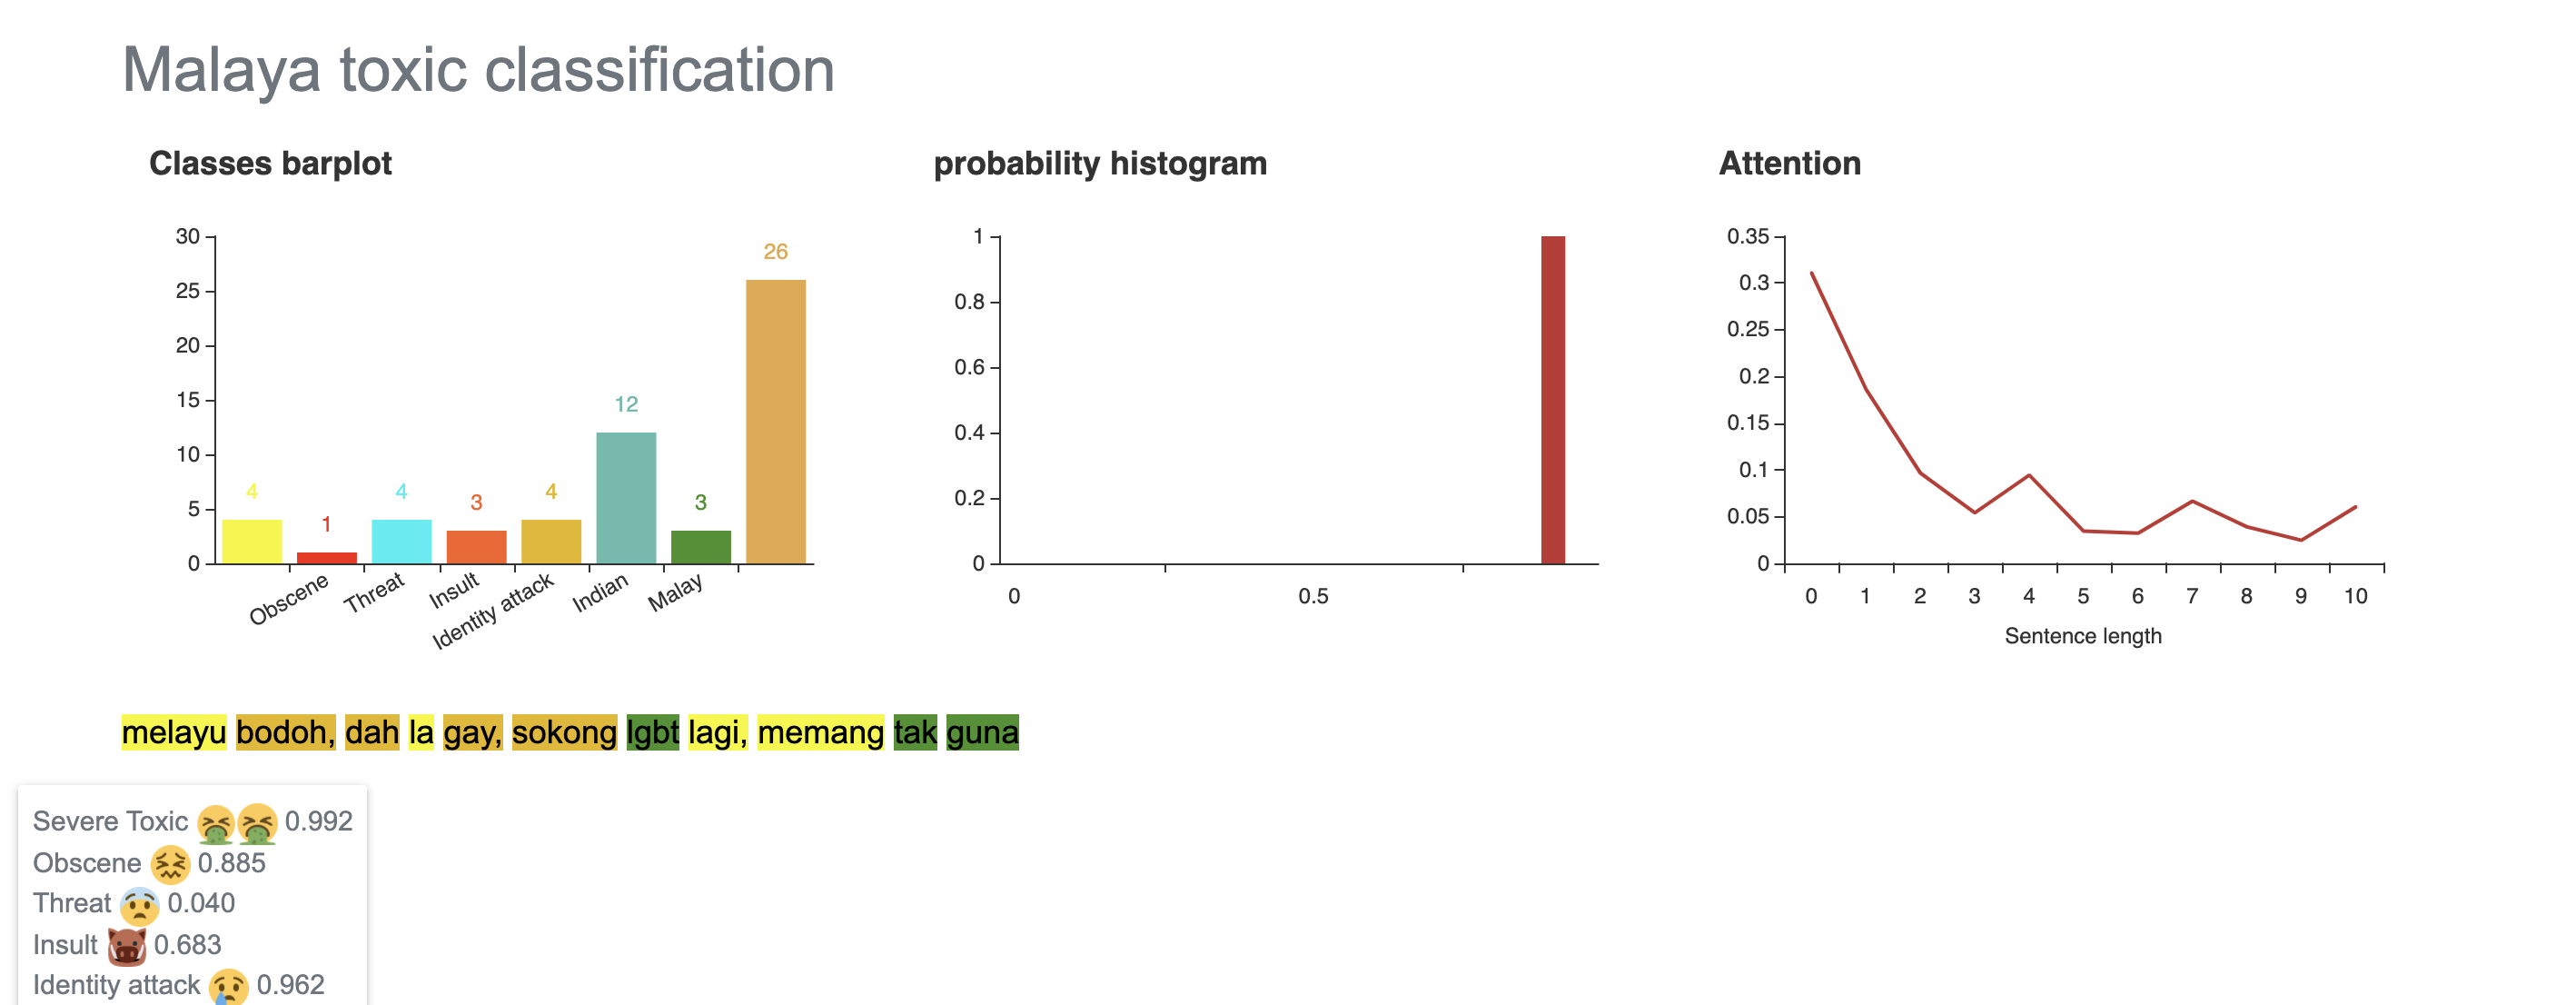

In [14]:
from IPython.core.display import Image, display

display(Image('toxicity-dashboard.png', width=800))

### Vectorize

Let say you want to visualize sentence / word level in lower dimension, you can use `model.vectorize`,

```python
def vectorize(self, strings: List[str], method: str = 'first'):
    """
    vectorize list of strings.

    Parameters
    ----------
    strings: List[str]
    method : str, optional (default='first')
        Vectorization layer supported. Allowed values:

        * ``'last'`` - vector from last sequence.
        * ``'first'`` - vector from first sequence.
        * ``'mean'`` - average vectors from all sequences.
        * ``'word'`` - average vectors based on tokens.

    Returns
    -------
    result: np.array
    """
```

#### Sentence level

In [8]:
texts = [string, another_string, string1, string2]
r = quantized_model.vectorize(texts, method = 'first')

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE().fit_transform(r)
tsne.shape

(4, 2)

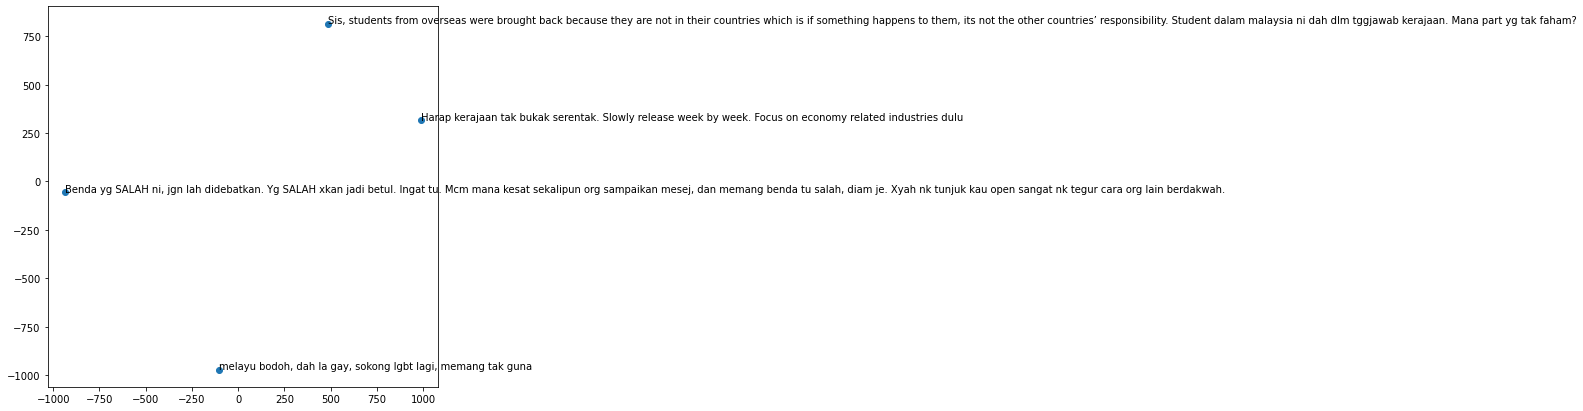

In [11]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = texts
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

#### Word level

In [17]:
r = quantized_model.vectorize(texts, method = 'word')

In [18]:
x, y = [], []
for row in r:
    x.extend([i[0] for i in row])
    y.extend([i[1] for i in row])

In [19]:
tsne = TSNE().fit_transform(y)
tsne.shape

(107, 2)

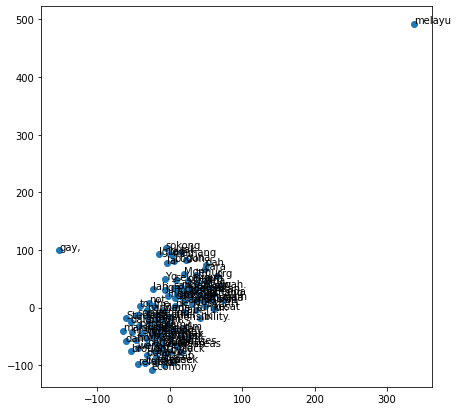

In [20]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = x
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

Pretty good, outliers are toxic words.

### Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [16]:
albert = malaya.toxicity.transformer(model = 'albert')

INFO:tensorflow:loading sentence piece model


In [18]:
malaya.stack.predict_stack([model, albert], [another_string])

[{'severe toxic': 0.9968317,
  'obscene': 0.43022493,
  'identity attack': 0.90531594,
  'insult': 0.42289576,
  'threat': 0.0058603976,
  'asian': 0.000983668,
  'atheist': 0.0005495089,
  'bisexual': 0.0009623809,
  'buddhist': 0.0003632398,
  'christian': 0.0018632574,
  'female': 0.006050684,
  'heterosexual': 0.0025569045,
  'indian': 0.0056869243,
  'homosexual, gay or lesbian': 0.012232827,
  'intellectual or learning disability': 0.00091394753,
  'male': 0.011594971,
  'muslim': 0.0042621437,
  'other disability': 0.00027529505,
  'other gender': 0.0010361207,
  'other race or ethnicity': 0.0012320877,
  'other religion': 0.00091365684,
  'other sexual orientation': 0.0027996385,
  'physical disability': 0.00010540871,
  'psychiatric or mental illness': 0.000815311,
  'transgender': 0.0016718076,
  'malay': 0.96644485,
  'chinese': 0.05199418}]